# 09 Introduction to Plotting, Part 2
File(s) needed: none

Plotting data on a graph is an important part of preparing it for analysis. Descriptive statistics are helpful but don't show the whole picture. Our first example will show why.

We will use three popular plotting libraries:
- matplotlib
- Seaborn
- basic plots included in pandas

This notebook will cover plotting with the Seaborn library. Plotting with matplotlib and pandas is in the **08_Plotting_1** notebook.

# A reminder about plotting
<p></p>
<div style="padding:20px;font-size:200%;color:maroon;background-color:cornsilk">
    <p style="text-align:center">Ability to create a plot != Need to create a plot</p>
</div>
<p></p>

# Seaborn graphics
The `matplotlib` library can be thought of as the core foundational plotting tool in Python. The `seaborn` library builds on `matplotlib` by providing a higher-level interface for statistical graphics. It allows you to create more professional-looking plots, so it is better for explanatory plotting.

From the Seaborn documentation:
>Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

https://seaborn.pydata.org/index.html

This will make more sense after a few examples.

In [1]:
# import the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# load a copy of the tips dataset
tips = sns.load_dataset("tips")

## Bar charts
For categorical data, seaborn provides a function called `countplot()`. This method counts the occurences of the values in the specified column and plots a bar chart based on the frequencies. Just specify the dataframe and the column of interest.


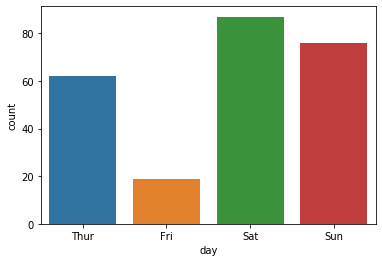

In [3]:
# Use the countplot method to plot tips by the day

sns.countplot(x="day", data=tips)

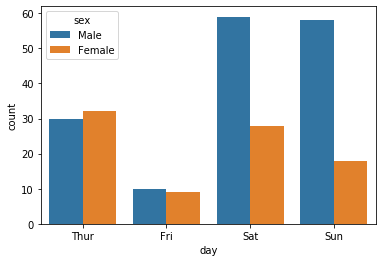

In [4]:
# make it a multiple bar chart by added the hue parameter
sns.countplot(x="day", hue="sex", data=tips)

### Scatter plot with regression line

Use lmplot() in order to access the `hue` and `col` parameters. `hue` specifies the third variable to use to split for the different colors and `col` is the variable used to split to separate plots.

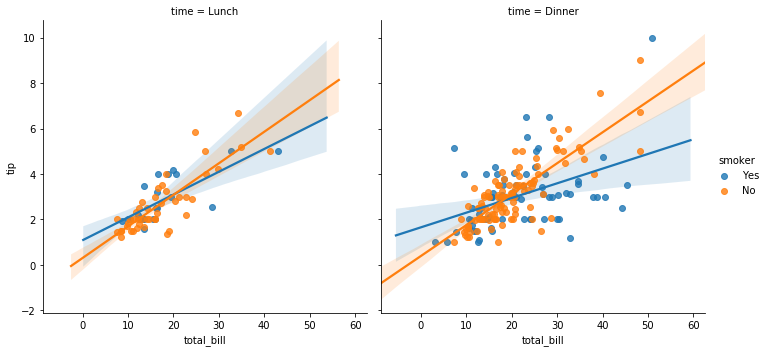

In [2]:
# Scatter plot with hue and col
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)


### Figure level versus axes level
The plots to this point are made with what seaborn calls "figure-level" functions. These can be useful for exploratory visualizations because they have defaults setup to automatically handle the most common situations, like adding a legend when it is necessary. 

Every time seaborn displays multiple plots - like the last one - it is using a process like the `subplots` we saw with matplotlib. (It actually uses a seaborn FacetGrid, which you can see mentioned in the previous output. Don't worry about it right now; we'll get there soon enough.) For now, just understand that the FacetGrid is the overall figure-level object that controls how the overall plot looks.

The FacetGrid contains one or more axes level objects. These are the objects that hold the actual plots and their properties can be adjusted individually.

The preferred way to use these (and the way shown in the text) is by creating figure-level and axes-level objects, then dealing with them individually. We will follow this convention from here.


## Histograms, Density Plots, and Rug Plots

Use the `sns.distplot` function from seaborn to create our plot. It combines the hist function, the kernel density estimate plot, and other features. Set different parameters to change what is displayed.

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

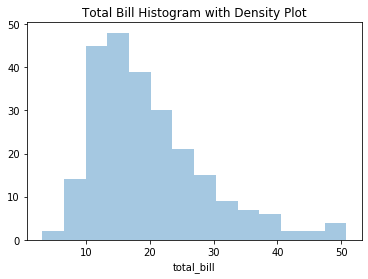

In [3]:
# Histogram in seaborn
hist, ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], kde=False)
ax.set_title("Total Bill Histogram with Density Plot")

- The default distplot will plot both a histogram and a density plot (using a kernel
density estimation)
- we can set the `kde` parameter to `False` if we just want the histogram

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

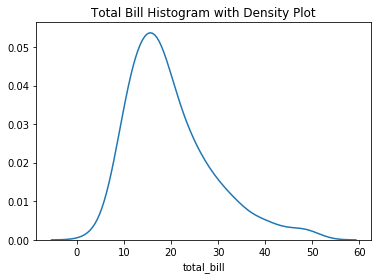

In [5]:
# Histogram only, add descriptive titles
hist, ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], hist=False)
ax.set_title("Total Bill Histogram with Density Plot")

### Density Plot (Kernel Density Estimation)
- Density plots are another way to visualize a univariate distribution
- In essence, they are created by drawing a normal distribution centered at each data point, then smoothing out the overlapping plots so the area under the curve is 1.
- use `sns.distplot` and set `hist=False`
- you can also use the `sns.kdeplot` function instead of `sns.displot`

In [ ]:
# density plot only


### Rug plot
- Rug plots are a one-dimensional representation of a variable’s distribution
- We'll plot a histogram with a density plot and a rug plot on the bottom using the `distplot` function

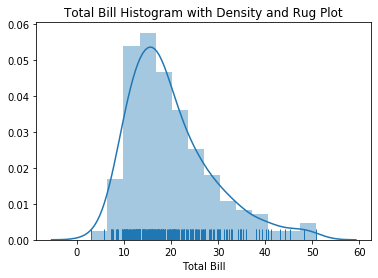

In [6]:
# rug plot
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')
plt.show()

## Bivariate data

### Scatterplot
- There is no explicit function named scatterplot
- Instead, we use either `regplot` or `lmplot`
    - Either will plot a scatterplot and fit a regression line
    - Set `fit_reg=False` in the function call and either will show only the scatterplot
- The main difference between them:
    - regplot creates axes - use it if you need to add customization
    - lmplot creates a figure

Text(0, 0.5, 'Tip')

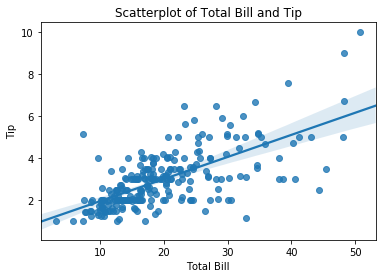

In [7]:
# Scatterplot with regression line using regplot
scatter, ax = plt.subplots()
ax = sns.regplot(x="total_bill", y="tip", data=tips)
ax.set_title("Scatterplot of Total Bill and Tip")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

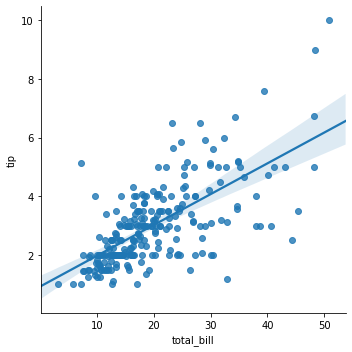

In [10]:
# Scatterplot with regression line using lmplot
fig = sns.lmplot(x="total_bill", y="tip", data=tips)


### Hexbin plot
Scatterplots are great for comparing two variables, but sometimes there are too many points for a scatterplot to be meaningful. A hexbin plot reduces the number of points by binning points on the plot together.

A hexagon is used for this purpose because it is the most efficient shape to cover an arbitrary 2D surface

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

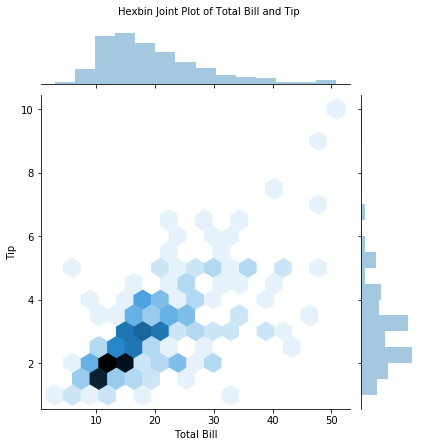

In [11]:
# Hexbin and histogram joint plot
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

### 2D density plot
- 2D kernel density plot s similar to how
`sns.kdeplot` works
    - except it creates a density plot across two variables

In [ ]:
# density plot in two dimensions


### Box and whiskers plot
-  boxplots show multiple statistics
    - minimum
    - first quartile
    - median
    - third quartile
    - maximum
    - outliers based on the interquartile range (if applicable)

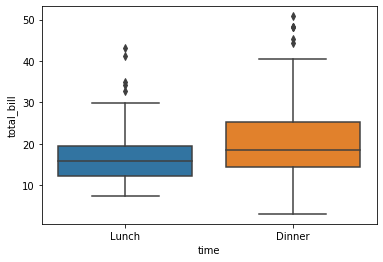

In [13]:
# Box plot
box, ax = plt.subplots()
# y parameter is optional for multiple plots in one figure
# If it is omitted, the plotting function will create a single box in the plot.
ax = sns.boxplot(x="time", y="total_bill", data = tips)

### Pairwise relationships
- visualizing all of the pairwise relationships can be easily performed using pairplot for numeric data.
- plots a scatterplot between each pair of variables and a histogram of each variable on the diagonal.

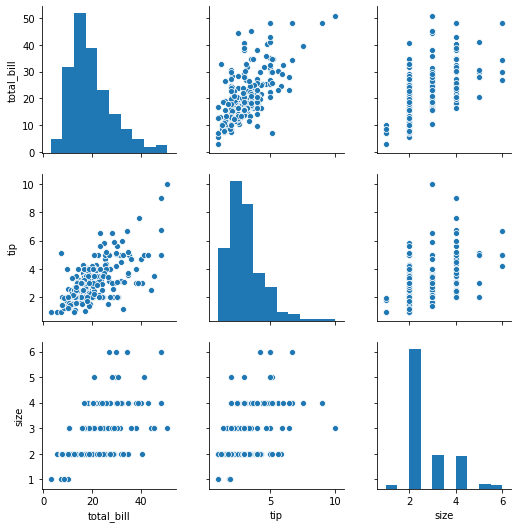

In [14]:
# pairwise plots
fig = sns.pairplot(tips)

- the top half of the the visualization above the diagonal is a mirror image of the bottom half.
- use pairgrid to manually assign the plots for the top half and bottom half

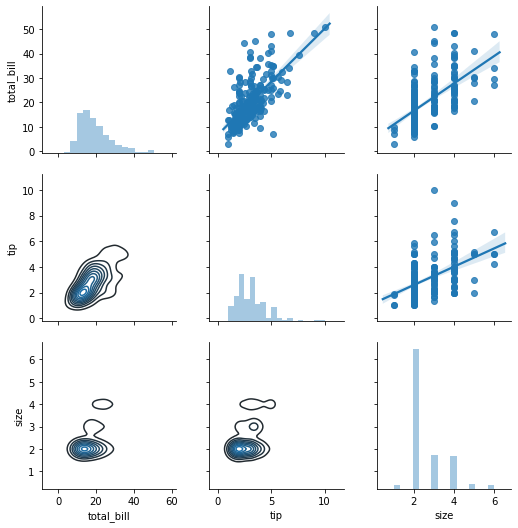

In [15]:
# Assign custom plots to different parts of pairplot
pair_grid = sns.PairGrid(tips)
# we can use plt.scatter instead of sns.regplot
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, kde=False)

# Multivariate data
- As with matplotlib, possible ways to include more information and distinguish data within the plot
    - color - use the `hue` parameter
    - size - use the `size` parameter
    - shape - use the `markers` parameter

## Colors

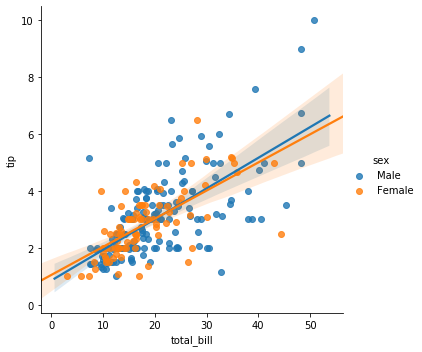

In [17]:
# Color used for multiple groups on scatterplot
# note the use of lmplot instead of regplot here because regplot doesn't take hue parameter
scatter = sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips, fit_reg=True)

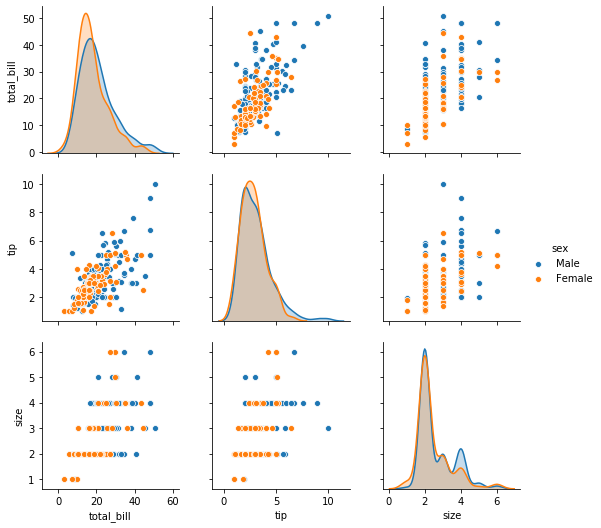

In [18]:
# pass a hue into pairplot
fig = sns.pairplot(tips, hue="sex")

## Size and shape
- point sizes can be another means to add more information to a plot
-  this option should be used sparingly, since the human eye is not very good at comparing areas

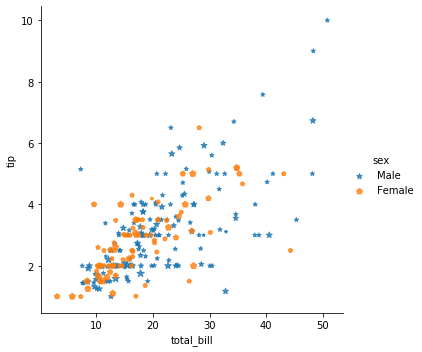

In [24]:
# scatter_kws is a dictionary that is passed on to the matplotlib function plt.scatter
# access the s parameter to change the size of the points
scatter = sns.lmplot(x="total_bill", y="tip", data=tips,
                    fit_reg=False, hue="sex", 
                     markers=["*","p"],
                     scatter_kws={"s":tips["size"]*10})

In [ ]:
# Use of color and shape to distinguish different values of the variable sex
# The hue parameter defines the third variable, not just the variable for color


### Facets
Seaborn can create a set of graphs from one dataset that is similar to the subplots we saw earlier. The difference here is that we don't specify each individual plot, just the overall parameters, including the variable on which to split the data (the `col` parameter). Seaborn does the rest.

Here is a recreation of the four Anscombe plots we did early in the Part 1 notebook.

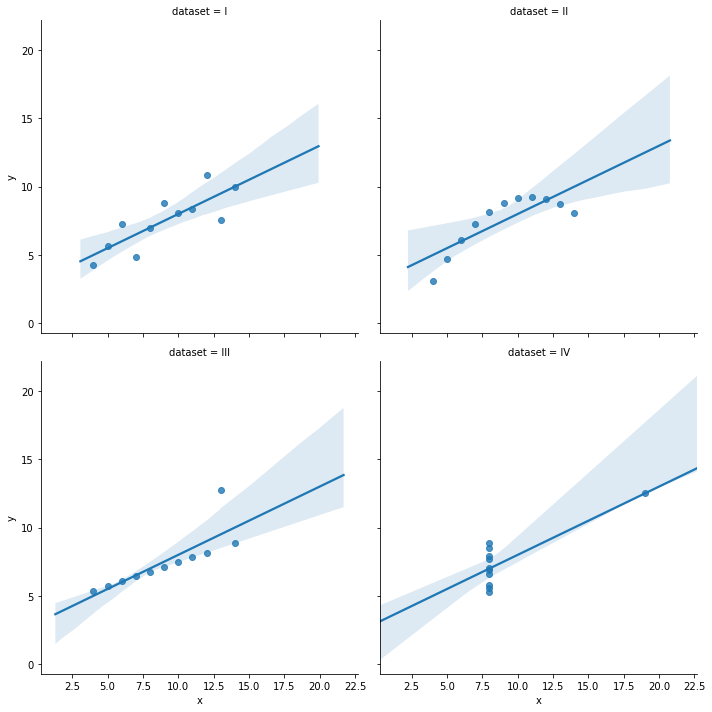

In [27]:
# Anscombe plots using seaborn
sns.set_style= ("dark")
anscombe = sns.load_dataset("anscombe")
anscombe_plot = sns.lmplot(x="x", y="y", data=anscombe, col="dataset", col_wrap=2)

The `FacetGrid` can be used to further customize your multi plot output. The `lmplot` function is a figure-level function so it has `col` and `col_wrap` parameters. Axes level functions like `regplot` don't have those and need to be placed in a portion of the grid. 

We will not spend any more time on this functionality because it is mostly needed for explanatory visualizations.

## Seaborn themes and styles

All the plots we have done in Seaborn use the default style. If you run the function `sns.set_style`, you can change the style for all subsequent plots. Styles included with Seaborn include
- dark
- white
- darkgrid
- whitegrid
- ticks

More information on using these styles is available in the seaborn documentation.